In [1]:
#---Imports-------------------------------------------------------------------
import os
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import numpy as np 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.callbacks import EarlyStopping

#Limite de numero de muestras
nmuestras = int(295)
#Numero de pixeles objetivo
npixeles = 128

rutas = list()
imgs = list()
species = list()


Using TensorFlow backend.


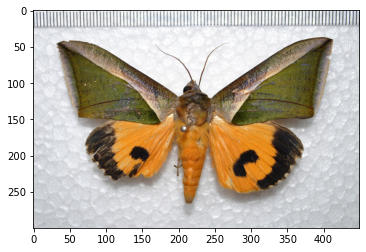

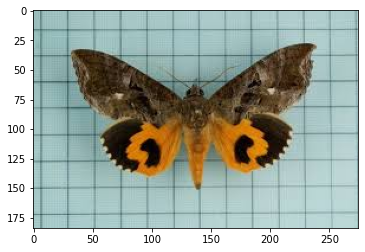

In [2]:
#----Lectura de Imagenes desde ficheros -------------------------------------
FruitPiercingMoth_images = os.listdir('Fruit.Piercing.Moth')
FruitPiercingMoth_ruta = ['Fruit.Piercing.Moth/' + x for x in FruitPiercingMoth_images][:nmuestras]


for i in range(2):
    img = imread(FruitPiercingMoth_ruta[i])
    plt.imshow(img)
    plt.show()

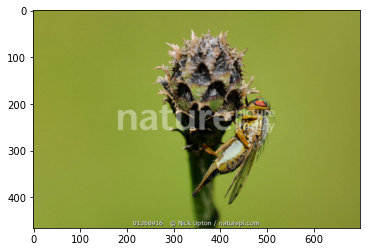

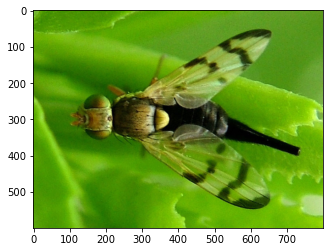

In [3]:
GallFlies_images = os.listdir('Gall.Flies')
GallFlies_ruta = ['Gall.Flies/' + x for x in GallFlies_images][:nmuestras]


for i in range(2):
    img = imread(GallFlies_ruta[i])
    plt.imshow(img)
    plt.show()

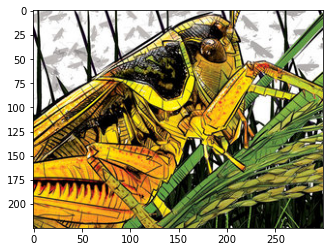

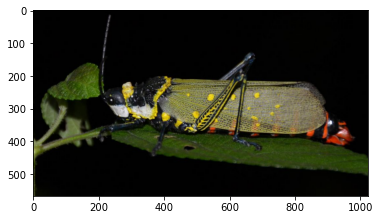

In [4]:
Locust_images = os.listdir('Locust')
Locust_ruta = ['Locust/' + x for x in Locust_images][:nmuestras]

for i in range(2):
    img = imread(Locust_ruta[i])
    plt.imshow(img)
    plt.show()

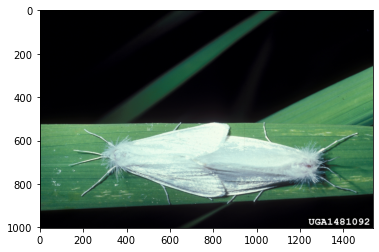

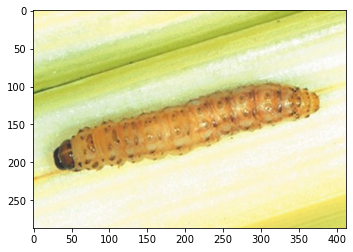

In [5]:
StemBorer_images = os.listdir('Stem.Borer')
StemBorer_ruta = ['Stem.Borer/' + x for x in StemBorer_images][:nmuestras]

for i in range(2):
    img = imread(StemBorer_ruta[i])
    plt.imshow(img)
    plt.show()

In [6]:
#---Se añaden todas las imagenes en formato numerico a un array de nombre array_imgs y la especie asociada a esta a otro llamado array_species

for i in range(nmuestras):
    img = load_img(FruitPiercingMoth_ruta[i], target_size=(npixeles, npixeles),color_mode = "grayscale")
    imgs.append(img_to_array(img))
    species.append(0)

for i in range(nmuestras):
    img = load_img(GallFlies_ruta[i], target_size=(npixeles, npixeles),color_mode = "grayscale")
    imgs.append(img_to_array(img))
    species.append(1)
    
for i in range(nmuestras):
    img = load_img(Locust_ruta[i], target_size=(npixeles, npixeles),color_mode = "grayscale")
    imgs.append(img_to_array(img))
    species.append(2)
    
for i in range(nmuestras):
    img = load_img(StemBorer_ruta[i], target_size=(npixeles, npixeles),color_mode = "grayscale")
    imgs.append(img_to_array(img))
    species.append(3)
    
array_imgs = np.asarray(imgs)
array_species = np.asarray(species)

In [7]:
#---Se aplica una funcion de normalizacion 
def normalize_scale(image_data):
    scale_min = 0
    scale_max = 255
    return ((image_data - scale_min) / (scale_max - scale_min))

array_imgs_scale = normalize_scale(array_imgs)

In [8]:
#---Se reescala la matriz para retirar el dato de color 
# array_imgs = array_imgs_scale.reshape(nmuestras*4,-1).reshape(nmuestras*4,npixeles,npixeles)
array_imgs.shape

(1180, 128, 128, 1)

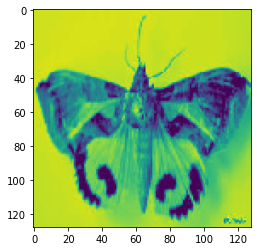

In [9]:
plt.imshow(array_imgs_scale[200])
plt.show()

In [10]:
X_fit, X_test, y_fit, y_test = train_test_split(array_imgs,array_species,test_size=0.3,random_state = 16)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,test_size=0.5,random_state = 42)

In [11]:
X_fit.shape, X_val.shape, X_test.shape

((826, 128, 128, 1), (177, 128, 128, 1), (177, 128, 128, 1))

In [30]:
def define_model():
    model = Sequential()
    model.add(Conv2D(npixeles, (3,3), activation='softmax',kernel_initializer='he_uniform',input_shape=(npixeles, npixeles,1)))
    model.add(MaxPooling2D((2, 2)))
#   model.add(Dropout(0.2))
    model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=PReLU()))
    model.add(Dense(4, activation='softmax'))
    model.add(Flatten())
    #opt = SGD(lr=0.005)
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# def define_model():
#     model = Sequential()
#     model.add(Flatten(input_shape=(npixeles,npixeles,1))) 
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(4, activation="softmax"))
#     model.add(Flatten())
#     model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#     return model

# 

In [31]:
modelo = define_model()

In [32]:
 callbacks = [EarlyStopping(monitor='val_accuracy',
                           patience=3,
                           restore_best_weights=True)]

In [33]:
history = modelo.fit(X_fit,
                    y_fit,
                    epochs = 30,
                    callbacks=callbacks,
                    verbose = 1,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Epoch 1/30
17/17 [==============================] - 67s 4s/step - loss: 2.3576 - accuracy: 0.2433 - val_loss: 1.3851 - val_accuracy: 0.3107
Epoch 2/30
17/17 [==============================] - 68s 4s/step - loss: 1.3742 - accuracy: 0.3535 - val_loss: 1.3625 - val_accuracy: 0.3164
Epoch 3/30
17/17 [==============================] - 64s 4s/step - loss: 1.3150 - accuracy: 0.3571 - val_loss: 1.3088 - val_accuracy: 0.3729
Epoch 4/30
17/17 [==============================] - 61s 4s/step - loss: 1.1820 - accuracy: 0.4976 - val_loss: 1.1885 - val_accuracy: 0.4689
Epoch 5/30
17/17 [==============================] - 61s 4s/step - loss: 1.0747 - accuracy: 0.5630 - val_loss: 1.1784 - val_accuracy: 0.4859
Epoch 6/30
17/17 [==============================] - 61s 4s/step - loss: 0.8845 - accuracy: 0.6598 - val_loss: 1.1422 - val_accuracy: 0.5141
Epoch 7/30
17/17 [==============================] - 62s 4s/step - loss: 0.6924 - accuracy: 0.7591 - val_loss: 1.1845 - val_accuracy: 0.5537
Epoch 8/30
17/17 [==

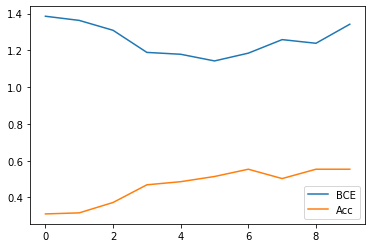

In [34]:
plt.plot(history.history['val_loss'], label='BCE')
plt.plot(history.history['val_accuracy'], label='Acc')
plt.legend()
plt.show()

In [1]:
prediccion = modelo.predict(X_test)
prediccion[56]

NameError: name 'modelo' is not defined

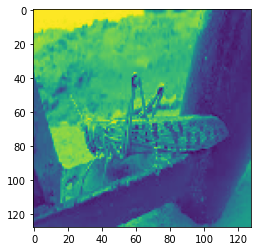

In [53]:
plt.imshow(X_test[56])
plt.show()